# K-means Clustering 

In this assignment, you will implement the K-means algorithm and use it for analysis of heart disease. 

* You will start with a sample dataset that will help you gain an intuition of how the K-means algorithm works. 
* After that, you will use the K-means algorithm for heart diseas classification.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hw10_utils import *


## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps:
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

You will implement the two phases of the K-means algorithm separately in the next sections. 
* You will start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.

### 1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

### Exercise 1

Your task is to complete the code in `find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 
Note that you can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html">np.linalg.norm</a> to calculate the distance between each point and a centroid and use <a href="https://numpy.org/doc/stable/reference/generated/numpy.argmin.html">np.argmin</a> to find the index of the minimum value.

In [22]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    distances = np.zeros(K)
    m = X.shape[0]
    for i in range(m):
        for j in range(K):
            distances[j] = abs(np.linalg.norm(X[i] - centroids[j]))
        idx[i] = np.argmin(distances)
    
    
    ### END CODE HERE ###
    
    return idx

Now let's check your implementation using an example dataset

In [12]:
# Load an example dataset that we will be using
X = np.load("data/hw10_X.npy")

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [8]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [23]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are", idx[:3])


First three elements in idx are [0 2 1]


**Expected Output**:
<table>
  <tr>
    <td> <b>First three elements in idx are<b></td>
    <td> [0 2 1] </td> 
  </tr>
</table>

<a name="1.2"></a>
### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


<a name="ex02"></a>
### Exercise 2

Please complete the `compute_centroids` below to recompute the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

Implementation hints: Say we wanted to find all the values in X that were assigned to cluster k=0. That is, the corresponding value in idx for these examples is 0. In Python, we can do it as X[idx == 0]. Similarly, the points assigned to centroid k=1 are X[idx == 1]

In [26]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for i in range(K):
        centroids[i] = (1 / len(X[idx == i])) * (np.sum(X[idx == i], axis=0))
    
    
    
    ### END CODE HERE ## 
    
    return centroids

Now check your implementation by running the cell below

In [27]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


**Expected Output**:

    The centroids are: [[2.42830111 3.15792418]
     [5.81350331 2.63365645]
     [7.11938687 3.6166844 ]]


## 2 - K-means on a sample dataset 

After you have completed the two functions (`find_closest_centroids`
and `compute_centroids`) above, the next step is to run the
K-means algorithm on a toy 2D dataset to help you understand how
K-means works. 
* Complete the function (`run_kMeans`) below and understand how it works. 
* Notice that the code calls the two functions you implemented in a loop.

When you complete and run the code below, it will produce a
visualization that steps through the progress of the algorithm at
each iteration. 


In [28]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


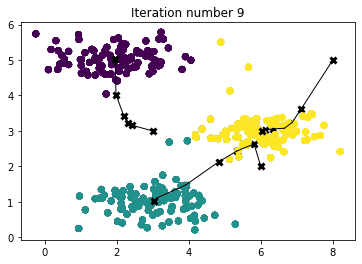

In [29]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)


## 3 - Random initialization

The initial assignments of centroids for the example dataset was designed so that you will see the same figure. In practice, a good strategy for initializing the centroids is to select random examples from the training set.

In this part of the exercise, you should understand how the function `kMeans_init_centroids` is implemented.
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
    * This allows the examples to be selected at random without the risk of selecting the same example twice.

**Note**: You do not need to implement anything for this part of the exercise.

In [30]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids


## 4 - K-Means Clustering for Analysis of Heart Disease

In this exercise, you will use K-means to group a heart disease dataset. 

### 4.1 Dataset

We will use the data set from Cleveland Clinic Foundation (i.e., processed.cleveland.data) again. But this time we assume we do not have the target values.

First, you will load the heart disease dataset, as shown below.

In [31]:
X = load_data("./data/processed.cleveland.data")

**Check the dimension of the variable**

As always, you will print out the shape of your variable to get more familiar with the data.

In [32]:
print("Shape of X is:", X.shape)

Shape of X is: (303, 13)



### 4.2 K-Means on Heart Disease Dataset

Now, run the cell below to run K-Means on the heart disease dataset.

In [33]:
# Run your K-Means algorithm on this data
# You can try different values of K and max_iters here
K = 5                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [34]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])
print("Shape of cetroids:", centroids.shape)

Shape of idx: (303,)
Closest centroid for the first five elements: [2 0 1 2 1]
Shape of cetroids: (5, 13)


### 4.3 Cost for K-Means Clustering

Once we have the centroids and idx, we can compute the cost that is defined below:

$$J(c^{(1)},..., c^{(m)}, \mu_1,..., \mu_K ) = \frac{1}{m} \sum\limits_{i = 0}^{m-1}\quad||x^{(i)} - \mu_j||^2$$

Complete the following function. Note that to get the examples that belong to a particular cluster/centroid, you can use X[idx == k].


In [41]:
def compute_cost(X, idx, centroids):
    """
    This function computes the cost given centroids and idx
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        centroids (ndarray): identified centroids
    
    Returns:
        cost: cost defined above
    """
          
    m = X.shape[0]
    K = centroids.shape[0]
    ### START CODE HERE ###
    sum_cost = 0
    for j in range(K):
        curr_cluster = X[idx == j]
        for i in range(len(curr_cluster)):
            sum_cost += (np.linalg.norm(curr_cluster[i] - centroids[j])) ** 2
    
    cost = sum_cost / m
    ### END CODE HERE ###
    return cost

Now, let's test your compute_cost function

In [42]:
X_test = np.array([[1., 1.],[1., 2.],[3., 3.],[3., 4.]])
centroids_test = np.array([[1., 1.5],[3., 3.5]])
idx_test = np.array([0, 0, 1, 1])

cost = compute_cost(X_test, idx_test, centroids_test)
print("Cost:", cost)

Cost: 0.25


**Expected Output**:

    Cost: 0.25

### 4.4 Initializing K-Means

As discussed in the lecture, we may get different clustering results given different initializations of the K centroids. In order to get a better clusstering result, we can run the K-means algorithm several times with different random initializations and then pick the set of clusters that gave lowest cost J.

In [55]:
def find_best_centroids(X, K, max_iters_centroids,max_iters_kmean):
    """
    This function computes the cost given centroids and idx
    
    Args:
        X (ndarray):   (m, n) Data points
        K (int):     number of centroids/clusters
        max_iters_centroids (int): number of different initilizations we want to try
        max_iters_kmean (int):  number of iterations for run_kMeans()
    
    Returns:
        best_centroids: best centroids after trying different random initilizations of the K centroids
        lowes_cost: lowest cost for different random initilizations of the K centroids
        
    """
    
    print("Centroids %d/%d:" % (0, max_iters_centroids-1))
    initial_centroids = kMeans_init_centroids(X, K)
    best_centroids, best_idx = run_kMeans(X, initial_centroids, max_iters_kmean)
    lowes_cost = compute_cost(X, best_idx, best_centroids)

    for i in range(max_iters_centroids-1):
        print("Centroids %d/%d:" % (i+1, max_iters_centroids-1))
        ### START CODE HERE ###
        curr_centroids = kMeans_init_centroids(X, K)
        curr_centroids, curr_idx = run_kMeans(X, curr_centroids, max_iters_kmean)
        curr_cost = compute_cost(X, curr_idx, curr_centroids)
        if(curr_cost < lowes_cost):
            lowes_cost = curr_cost
            best_centroids, best_idx = curr_centroids, curr_idx
        
        ### END CODE HERE ###
    return best_centroids, lowes_cost


In [56]:
max_iters_centroids = 10
max_iters_kmean = 10
K=5
best_centroids, lowes_cost = find_best_centroids(X, K, max_iters_centroids, max_iters_kmean)
print("Lowest cost:", lowes_cost)
print("Best centroids:", best_centroids)

Centroids 0/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 1/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 2/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 3/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 4/9:
K-Means iteration 0/9
K-Means iteration 1/9
K

### 4.5 Choosing the Right Number of Clusters

To get the right value of K, we can try different values of K and find the lowest cost for each K. We can then plot all these costs. For some applications, you may see an "elbow" which might indicate the right value of K. For some other applications, the right "K" is often ambiguous.

Run the following cell to get the cost list. It will take a couple of minutes.

In [51]:
cost_list = []
for k in range(2, 15):
    centroids, cost = find_best_centroids(X, k, max_iters_centroids, max_iters_kmean)
    print("Cost for k= %d:%f" % (k, cost))
    cost_list.append(cost)

Centroids 0/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 1/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 2/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 3/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 4/9:
K-Means iteration 0/9
K-Means iteration 1/9
K

K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 6/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 7/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 8/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 9/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteratio

K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 1/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 2/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 3/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 4/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteratio

K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 6/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 7/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 8/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Centroids 9/9:
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteratio

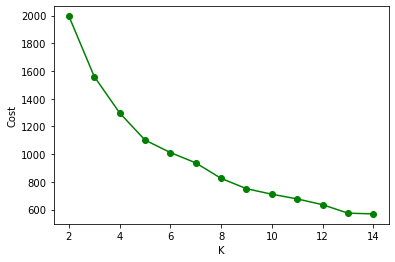

In [52]:
plt.plot(range(2,15), cost_list, 'og-')
plt.xlabel("K")
plt.ylabel("Cost");

One can see that there seems to be an "elbow" at k=5, but it is not clear. In this case, the right value of "K" really depends on the domain experts and the purpose of clustering. If you want, you can load the previous dataset in this assignment and run the above two cells again. You will see a much clearer "elbow". 